# Lesson 6 Notes: Creating Functions

These are some notes for [Software Carpentry](https://software-carpentry.org/)'s tutorial [*Programming with Python*](http://swcarpentry.github.io/python-novice-inflammation/).  The web page for this lesson can be found [here](http://swcarpentry.github.io/python-novice-inflammation/06-func/).

## The Goal

> How to package repeated code into functions

## Assessment: Where are we so far?

Why our code is ***slick:***

* We can perform multiple checks and graph multiple files.

Why our code ***sucks:***

* We have to write everything longhand each time we want to use it.

## Functions: Holding onto things you might want to do again...

Suppose you want to convert a temperature measurement from degrees Fahrenheit to Kelvin.  It's in the nature of temperature measurements that

> if you need to measure the temperature once, you probably need to measure it **many times**.

So you'll probably need to convert lots of measurements.  Let's package the process into a function.

A function consists of a few basic parts:

* definition keyword,
* function name,
* parameters,
* return value.

In [1]:
def fahr_to_kelvin(temp):
    return ((temp - 32)*(5/9)) + 273.15

Analysis:

* `def`: keyword
* `fahr_to_kelvin`: name
* `temp`: parameter
* `((temp - 32)*(5/9)) + 273.15`: return value

Use it.

In [2]:
print('freezing point of water:', fahr_to_kelvin(32))
print('boiling point of water:', fahr_to_kelvin(212))

freezing point of water: 273.15
boiling point of water: 373.15


Understand it.

* `fahr_to_kelvin(32))`
    * Now we've set `temp = 32`.
    * Then `temp - 32` becomes 0.
    * Hence `((temp - 32)*(5/9)) + 273.15` becomes 273.15.
    * So `fahr_to_kelvin(32))` returns the value 273.15.

## Aside: Integer vs. Floating-Point Division

In [3]:
# Python 3
print(5/9)

0.5555555555555556


In [4]:
# Python 3
print(5//9)

0


In Python 3:

* `5/9` gives the answer as a **real number** (decimal);
* `5//9` gives the **whole-number part** of the answer (discarding the remainder).

In Python 2:

* `5/9` gives the **whole-number part** (discarding the remainder);
* You need to **convert to floating-point numbers** for real number division:
    * `float(5)/9`
    * `5/float(9)`
    * `5.0/9`
    * `5/9.0`

## Composition: Functions within Functions

There's no prohibition to using a function within a function.

Let's convert Kelvin to degrees Celsius.

In [5]:
def kelvin_to_celsius(temp_k):
    return temp_k - 273.15

**Note:** it's helpful to name parameters in a way that reminds you of how the function should work.  Here think about why we write `temp_k` instead of `temp`.

In [6]:
print('absolute zero in Celsius:', kelvin_to_celsius(0.0))

absolute zero in Celsius: -273.15


Let's convert degrees Fahrenheit to degress Celsius.

In [7]:
def fahr_to_celsius(temp_f):
    temp_k = fahr_to_kelvin(temp_f)
    result = kelvin_to_celsius(temp_k)
    return result

In [8]:
print('freezing point of water in Celsius:', fahr_to_celsius(32.0))

freezing point of water in Celsius: 0.0


Template:

* Break down process into bite-sized chunks.
* Package those chunks into functions.
* Reuse chunks as needed.
* Build up bigger chunks from smaller chunks.

## Cleaning Up: Let's Chunkerize Our Code!

Our method of creating figures is something we need to use again and again.  It makes for a nice, self-contained part of the process.  Put it in a function.

In [9]:
def analyze(filename):

    data = numpy.loadtxt(fname=filename, delimiter=',')

    fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(numpy.mean(data, axis=0))

    axes2.set_ylabel('max')
    axes2.plot(numpy.max(data, axis=0))

    axes3.set_ylabel('min')
    axes3.plot(numpy.min(data, axis=0))

    fig.tight_layout()
    matplotlib.pyplot.show()

We also needed to check for problems in each file, and that process too was repetitive.  Put it in a function.

In [10]:
def detect_problems(filename):

    data = numpy.loadtxt(fname=filename, delimiter=',')

    if numpy.max(data, axis=0)[0] == 0 and numpy.max(data, axis=0)[20] == 20:
        print('Suspicious looking maxima!')
    elif numpy.sum(numpy.min(data, axis=0)) == 0:
        print('Minima add up to zero!')
    else:
        print('Seems OK!')

Now let's try the analysis again.

In [13]:
import numpy
import matplotlib.pyplot
import glob

In [17]:
filenames = sorted(glob.glob('data/inflammation*.csv'))

Now the logic of each loop is **much** clearer.

data/inflammation-01.csv


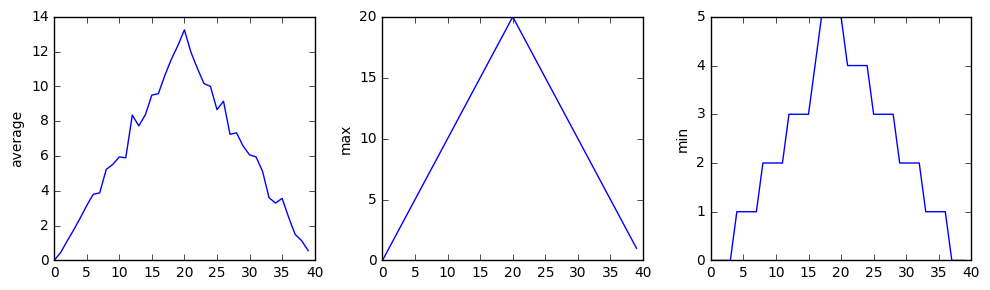

Suspicious looking maxima!
data/inflammation-02.csv


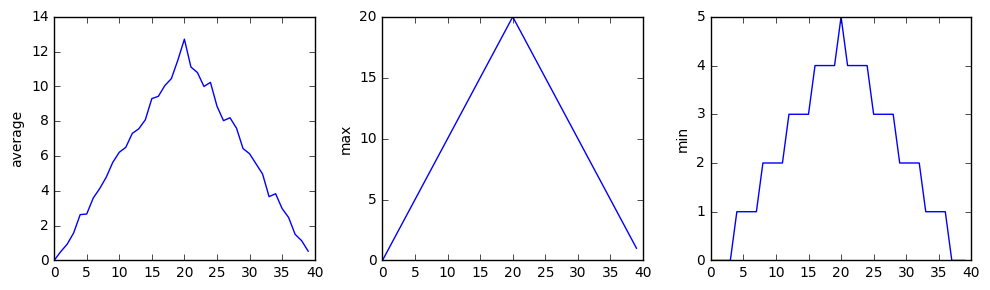

Suspicious looking maxima!
data/inflammation-03.csv


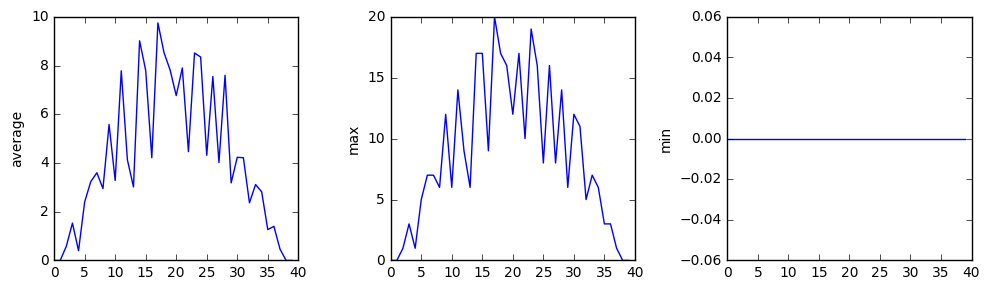

Minima add up to zero!


In [18]:
for f in filenames[:3]:
    print(f)
    analyze(f)
    detect_problems(f)

## Testing

Let's center a dataset on a different value.

In [31]:
# When possible, let the structure of the program document what's happening

def center(data, desired):
    # Find the natural center and write everything as offsets from that
    offsets = data - numpy.mean(data)
    
    # pick a new center and add the offsets from there
    shifted = offsets + desired
    return shifted

Check to see if it works.  *Use data you **understand**!*

In [20]:
z = numpy.zeros((2,2))

In [21]:
print(z)

[[ 0.  0.]
 [ 0.  0.]]


In [22]:
print(center(z, 3))

[[ 3.  3.]
 [ 3.  3.]]


In [23]:
print(center(z, -8))

[[-8. -8.]
 [-8. -8.]]


That looks sensible.

Try it on our real data.

In [25]:
data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')
print(center(data, 0))

[[-6.14875 -6.14875 -5.14875 ..., -3.14875 -6.14875 -6.14875]
 [-6.14875 -5.14875 -4.14875 ..., -5.14875 -6.14875 -5.14875]
 [-6.14875 -5.14875 -5.14875 ..., -4.14875 -5.14875 -5.14875]
 ..., 
 [-6.14875 -5.14875 -5.14875 ..., -5.14875 -5.14875 -5.14875]
 [-6.14875 -6.14875 -6.14875 ..., -6.14875 -4.14875 -6.14875]
 [-6.14875 -6.14875 -5.14875 ..., -5.14875 -5.14875 -6.14875]]


Huh?

Who knows what the answers should look like?

Investigate some salient data...

In [26]:
print('original min, mean, and max are:', numpy.min(data), numpy.mean(data), numpy.max(data))

original min, mean, and max are: 0.0 6.14875 20.0


In [27]:
centered = center(data, 0)

In [28]:
print('min, mean, and max of centered data are:', numpy.min(centered), numpy.mean(centered), numpy.max(centered))

min, mean, and max of centered data are: -6.14875 2.84217094304e-16 13.85125


Think about it:

* the mean was roughly 6.1
    * now the minimum is roughly -6.1
* the mean is now almost 0
    * that's what we were trying to center around

In [29]:
print('std dev before and after:', numpy.std(data), numpy.std(centered))

std dev before and after: 4.61383319712 4.61383319712


The standard deviation **looks** the same before and after.  But sometimes it's hard to tell... look at the difference.

In [30]:
print('difference in standard deviations before and after:', numpy.std(data) - numpy.std(centered))

difference in standard deviations before and after: 0.0


## Documentation

**Code** should be commented.

But **functions** have a special additional documentation: **doc(umentation) string**.

The docstring

* comes right after the line defining the function name;
* is triple-quoted.

In [32]:
def center(data, desired):
    '''Return a new array containing the original data centered around the desired value.'''
    
    # Find the natural center and write everything as offsets from that
    offsets = data - numpy.mean(data)
    
    # pick a new center and add the offsets from there
    shifted = offsets + desired
    return shifted

Use the docstring as **true documentation**, e.g. with **example usage**.

In [33]:
def center(data, desired):
    '''Return a new array containing the original data centered around the desired value.
    Example: center([1, 2, 3], 0) => [-1, 0, 1]'''
    
    # Find the natural center and write everything as offsets from that
    offsets = data - numpy.mean(data)
    
    # pick a new center and add the offsets from there
    shifted = offsets + desired
    return shifted

With triple-quotes you can use multiple lines of text in the docstring.

Now the `help()` function lets you access the docstring.

In [34]:
help(center)

Help on function center in module __main__:

center(data, desired)
    Return a new array containing the original data centered around the desired value.
    Example: center([1, 2, 3], 0) => [-1, 0, 1]



## Default Parameters

We've been writing...

In [35]:
data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

We can omit `fname=`

In [36]:
data = numpy.loadtxt('data/inflammation-01.csv', delimiter=',')

But not `delimiter=`

In [37]:
data = numpy.loadtxt('data/inflammation-01.csv', ',')

TypeError: data type "," not understood

Let's rewrite our function `center()` using keywords with default values.

In [38]:
def center(data, desired=0.0):
    '''Return a new array containing the original data centered around the desired value.
    Example: center([1, 2, 3], 0) => [-1, 0, 1]'''
    
    # Find the natural center and write everything as offsets from that
    offsets = data - numpy.mean(data)
    
    # pick a new center and add the offsets from there
    shifted = offsets + desired
    return shifted

Test it out.

In [39]:
test_data = numpy.zeros((2, 2))

In [40]:
print(test_data)

[[ 0.  0.]
 [ 0.  0.]]


In [41]:
print(center(test_data, 3))

[[ 3.  3.]
 [ 3.  3.]]


In [42]:
more_data = 5 + numpy.zeros((2, 2))

In [43]:
print(more_data)

[[ 5.  5.]
 [ 5.  5.]]


In [44]:
# now we don't need to give a second parameter
# if we omit it, it uses the default 0.0
print(center(more_data))

[[ 0.  0.]
 [ 0.  0.]]


Matching passed values to parameters...

In [45]:
def display(a=1, b=2, c=3):
    print('a:', a, 'b:', b, 'c:', c)

In [46]:
print('no parameters:')
display()

no parameters:
a: 1 b: 2 c: 3


In [47]:
print('one parameter:')
display(55)

one parameter:
a: 55 b: 2 c: 3


In [48]:
print('two parameters:')
display(55, 66)

two parameters:
a: 55 b: 66 c: 3


Parameters are

* matched left to right
* given their default value if nothing matches

To override this, give the parameter name.

In [49]:
print('only setting the value of c')
display(c=77)

only setting the value of c
a: 1 b: 2 c: 77


Compare the `numpy.loadtxt()` docstring.  There's only one parameter, `fname`, without a default value.

The second parameter passed, if the parameter name isn't given, will be assigned to the parameter `dype`.  That's what `','` was assigned to in our calls where we didn't write `delimiter=`.

In [50]:
help(numpy.loadtxt)

Help on function loadtxt in module numpy.lib.npyio:

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)
    Load data from a text file.
    
    Each row in the text file must have the same number of values.
    
    Parameters
    ----------
    fname : file or str
        File, filename, or generator to read.  If the filename extension is
        ``.gz`` or ``.bz2``, the file is first decompressed. Note that
        generators should return byte strings for Python 3k.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        structured data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must match the number of fields in
        the data-type.
    comments : str or sequence, optional
        The characters or list of characters us

## Readability

If your function **executes**, then it's **machine readable**.

But the machine **doesn't write** programs.  **People** do.

Make your code **human readable**.

In [51]:
# Bad example
def s(p):
    a = 0
    for v in p:
        a += v
    m = a / len(p)
    d = 0
    for v in p:
        d += (v - m) * (v - m)
    return numpy.sqrt(d / (len(p) - 1))

In the above

* the name doesn't tell you what it does;
* the variable names don't give any clue to what they represent.

In [52]:
# Good example of the same function
def std_dev(sample):
    sample_sum = 0
    for value in sample:
        sample_sum += value

    sample_mean = sample_sum / len(sample)

    sum_squared_devs = 0
    for value in sample:
        sum_squared_devs += (value - sample_mean) * (value - sample_mean)

    return numpy.sqrt(sum_squared_devs / (len(sample) - 1))